In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math

import acquire as a
import prepare as p
from env import get_connection

In [2]:
#item_df = a.tsa_item_demand()

In [3]:
store = a.acquire_store()

In [4]:
another_df = store.copy()

In [5]:
store.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


1. Convert date column to datetime format.

In [6]:
store['sale_date'] = pd.to_datetime(store['sale_date'], infer_datetime_format=True)

2. Plot the distribution of sale_amount and item_price.

<AxesSubplot:xlabel='sale_amount', ylabel='Count'>

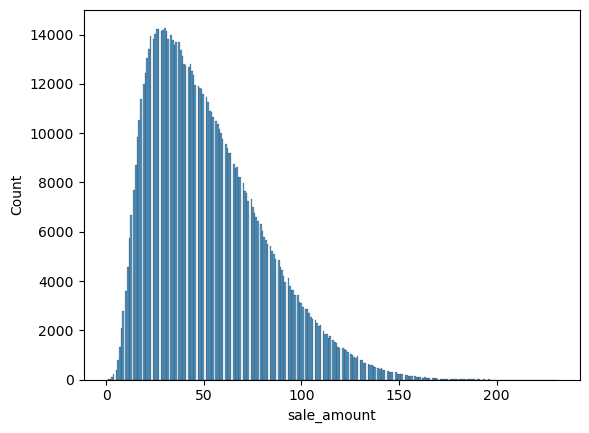

In [7]:
sns.histplot(data=store, x='sale_amount')

(array([1.41304e+05, 3.09995e+05, 2.32808e+05, 1.36482e+05, 6.28770e+04,
        2.25590e+04, 5.86500e+03, 1.00900e+03, 9.60000e+01, 5.00000e+00]),
 array([  0. ,  23.1,  46.2,  69.3,  92.4, 115.5, 138.6, 161.7, 184.8,
        207.9, 231. ]),
 <BarContainer object of 10 artists>)

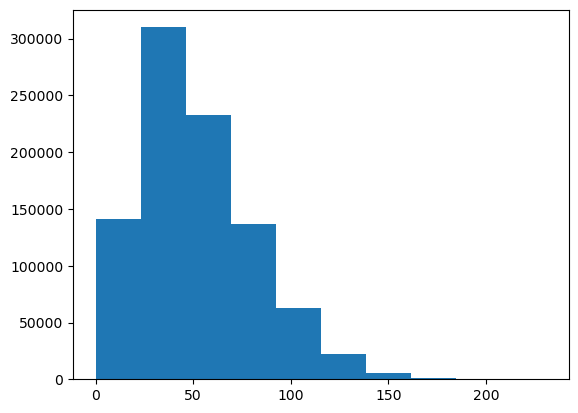

In [8]:
plt.hist(store.sale_amount)

(array([109560.,  54780., 109560.,  91300.,  54780., 127820.,  54780.,
        109560., 109560.,  91300.]),
 array([0.6  , 1.504, 2.408, 3.312, 4.216, 5.12 , 6.024, 6.928, 7.832,
        8.736, 9.64 ]),
 <BarContainer object of 10 artists>)

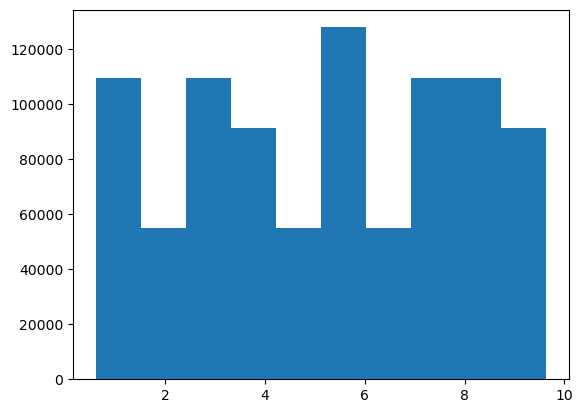

In [9]:
plt.hist(store.item_price)

3. Set the index to be the datetime variable.

In [10]:
store = store.set_index('sale_date').sort_index()

4. Add a 'month' and 'day of week' column to your dataframe.

In [11]:
store['month'] = store.index.month_name()

In [12]:
store['day'] = store.index.day_name()

In [13]:
store.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [14]:
store['sales_total'] = store.sale_amount * store.item_price

In [15]:
store.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [16]:
new_function = p.prepare_store(another_df)

In [17]:
new_function.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00


## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [18]:
germany = a.wrangle_germany_power()

In [19]:
new_df = germany.copy()

1. Convert date column to datetime format.

In [20]:
germany['Date'] = pd.to_datetime(germany['Date'])

2. Plot the distribution of each of your variables.

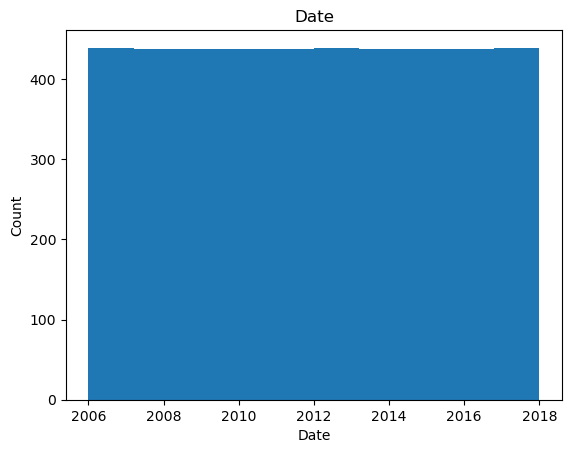

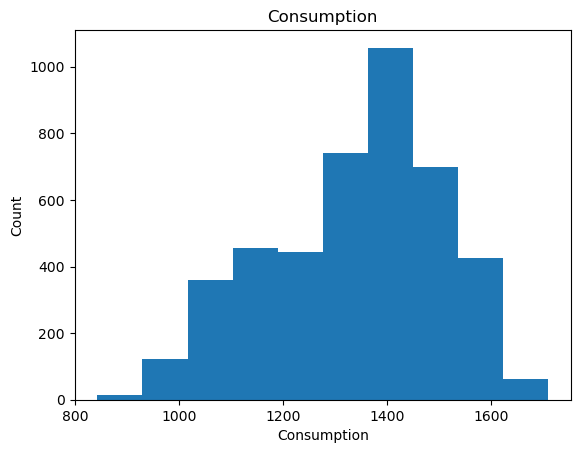

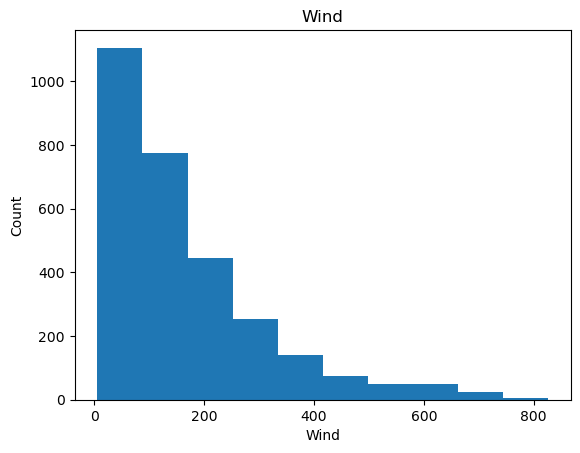

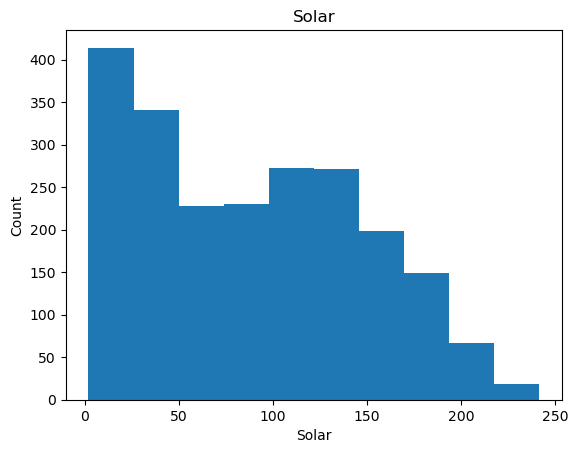

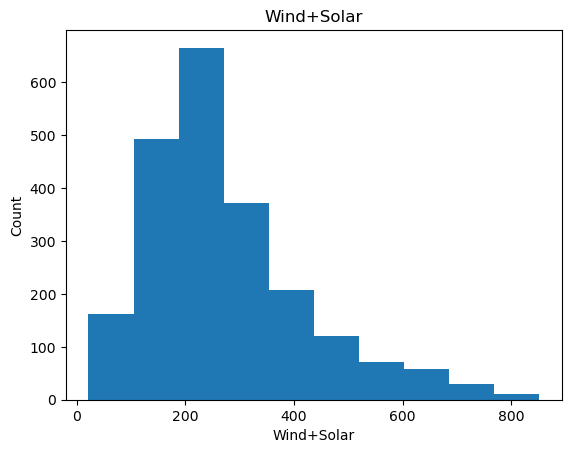

In [21]:
for item in germany:
    plt.hist(germany[item])
    plt.title(item)
    plt.xlabel(item)
    plt.ylabel("Count")
    plt.show()

3. Set the index to be the datetime variable.

In [22]:
germany.set_index('Date', inplace=True)

4. Add a month and a year column to your dataframe.

In [23]:
germany['Month'] = germany.index.month_name()

In [24]:
germany['Day'] = germany.index.day_name()

5. Fill any missing values.

In [25]:
for item in germany:
    print(f'{item} has {germany[item].isnull().sum()} missing items.')

Consumption has 0 missing items.
Wind has 1463 missing items.
Solar has 2195 missing items.
Wind+Solar has 2196 missing items.
Month has 0 missing items.
Day has 0 missing items.


In [26]:
germany.fillna(0, inplace=True)

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [27]:
new_df = p.prepare_germany(new_df)

In [28]:
new_df.head()

,Consumption,Wind,Solar,Wind+Solar,Month,Day
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,January,Monday
2006-01-03,1442.533,0.0,0.0,0.0,January,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,January,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,January,Thursday
